# Principal component analysis 
PCA (Principal component analysis) is a powerful tool often used in dimensionality reduction.

We will today use PCA to reduce the dimensionality of the Iris dataset from $X \in \mathbb{R}^4$ to $X' \in \mathbb{R}^2$.

In [1]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# plot data and fit (2d only)
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [2]:
# import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = StandardScaler().fit_transform(iris_df)
target = iris.target
print ("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Number of samples :: 150
Number of features :: 4


## Dimensionality reduction.
To use PCA in practice, simply use the following function:

```{Python}
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(data_to_transform)

```
Find the documentation here: [sklearn PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [3]:
###
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
###

Plot the principal components and compare them to X:

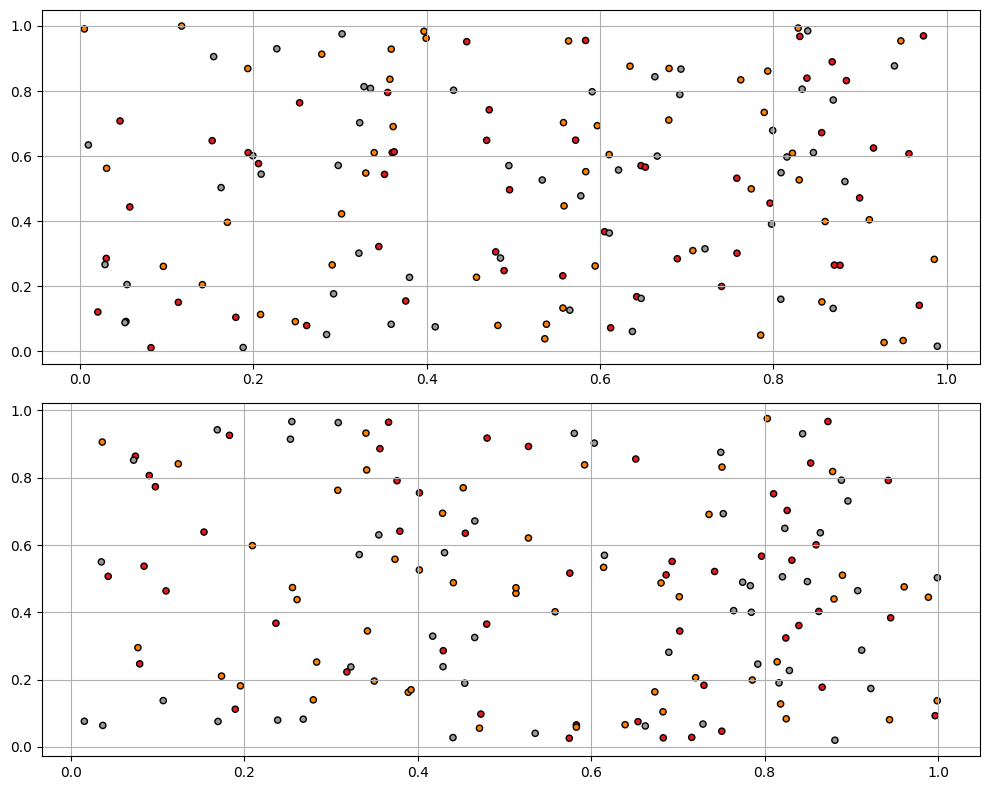

In [4]:
###
x, y = X[:, 0], X[:, 1]
x1, y1 = principalComponents[:, 0], principalComponents[:, 1]
###
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(211)

#Plot scaled version
x, y = np.random.rand(2, 150)
g = plt.scatter(x, y, c = target, cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.subplot(212)

# Plot principal components
x1, y1 = np.random.rand(2, 150)
plt.scatter(x1, y1, c = target,cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.tight_layout()
plt.show()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

By using the attribute `explained_variance_ratio_`, you can see that the first principal component explains 72.77% of the variance and the second principal component explains 23.03% of the variance.

In [6]:
print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


So, in total our PCA has now expressed 96% of the variance of the dataset.
We can use these new components to attempt to fit an SVM like we did in the previous exercise. The lower dimensional data should retain most of the information in the original data and therefore should compete close to on par with a classifier trained on all features.

## Exercises
### 1) SVM
Apply an SVM to the principal components. How does it perform compared to using only two features per sample?

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

svm_original = LinearSVC(max_iter=10000)
svm_original.fit(X_train[:, :2], y_train)
original_score = svm_original.score(X_test[:, :2], y_test)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.2, random_state=42)

svm_pca = LinearSVC(max_iter=10000)
svm_pca.fit(X_train_pca, y_train_pca)
pca_score = svm_pca.score(X_test_pca, y_test_pca)

print("SVM Accuracy using the first two original features: {:.2f}".format(original_score))
print("SVM Accuracy using the first two principal components: {:.2f}".format(pca_score))

SVM Accuracy using the first two original features: 0.93
SVM Accuracy using the first two principal components: 0.93


## 2) Three principal components
Attempt with three principal components. 
How much of the variance of the data do these express? 

Again, make a 3D plot where each point is colored respective to the predicted class from your SVM.

Explained variance by each of the first three principal components:
[0.72962445 0.22850762 0.03668922]
Total explained variance by the first three components: 0.99
SVM Accuracy using the first three principal components: 0.96


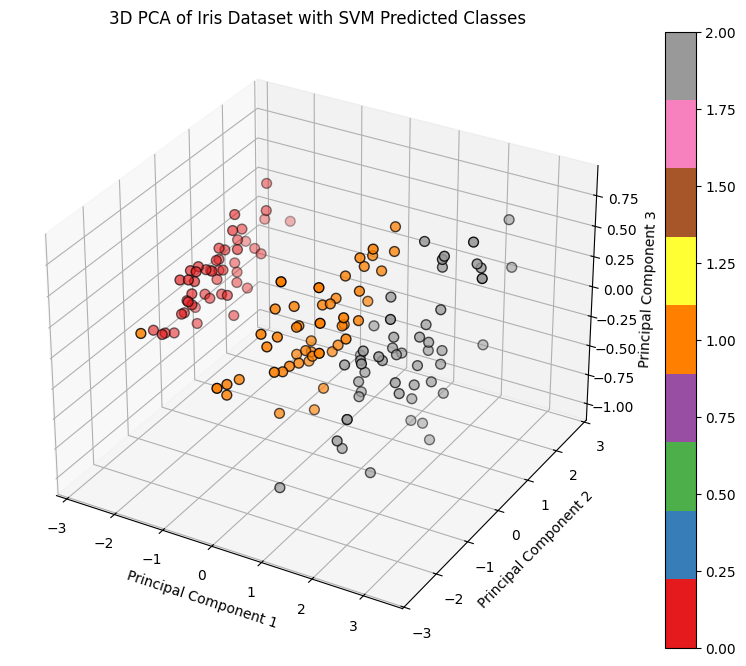

In [10]:
# Apply PCA with three components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

explained_variance = pca_3d.explained_variance_ratio_
print("Explained variance by each of the first three principal components:")
print(explained_variance)
print("Total explained variance by the first three components: {:.2f}".format(np.sum(explained_variance)))

X_train_pca_3d, X_test_pca_3d, y_train_pca_3d, y_test_pca_3d = train_test_split(X_pca_3d, target, test_size=0.3, random_state=42)

# Train SVM using the three principal components
svm_pca_3d = LinearSVC(max_iter=10000)
svm_pca_3d.fit(X_train_pca_3d, y_train_pca_3d)
pca_3d_score = svm_pca_3d.score(X_test_pca_3d, y_test_pca_3d)

# Print the accuracy score for the model trained with three principal components
print("SVM Accuracy using the first three principal components: {:.2f}".format(pca_3d_score))

# 3D plot of the data colored by predicted class
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Predict the classes for the 3D plot
y_pred_3d = svm_pca_3d.predict(X_pca_3d)

# Plot the points colored by the predicted class
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_pred_3d, cmap=plt.cm.Set1, edgecolor='black', s=50)
ax.set_title('3D PCA of Iris Dataset with SVM Predicted Classes')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter)
plt.show()



## 3) Best accuracy
Compare all the different SVM's we have trained. What is the best accuracy you can acheive?. You are also allowed to use different kernels!

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# SVM on original features (first two features)
svm_original = LinearSVC(max_iter=10000)
svm_original.fit(X_train[:, :2], y_train)
original_score = svm_original.score(X_test[:, :2], y_test)

# SVM with different kernel on original features
svm_original_rbf = sk.svm.SVC(kernel='rbf')
svm_original_rbf.fit(X_train[:, :2], y_train)
original_rbf_score = svm_original_rbf.score(X_test[:, :2], y_test)

# SVM on the first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
X_train_pca_2d, X_test_pca_2d, y_train_pca_2d, y_test_pca_2d = train_test_split(X_pca_2d, target, test_size=0.3, random_state=42)

svm_pca_2d = LinearSVC(max_iter=10000)
svm_pca_2d.fit(X_train_pca_2d, y_train_pca_2d)
pca_2d_score = svm_pca_2d.score(X_test_pca_2d, y_test_pca_2d)

svm_pca_2d_rbf = sk.svm.SVC(kernel='rbf')
svm_pca_2d_rbf.fit(X_train_pca_2d, y_train_pca_2d)
pca_2d_rbf_score = svm_pca_2d_rbf.score(X_test_pca_2d, y_test_pca_2d)

# SVM on the first three principal components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
X_train_pca_3d, X_test_pca_3d, y_train_pca_3d, y_test_pca_3d = train_test_split(X_pca_3d, target, test_size=0.3, random_state=42)

svm_pca_3d = LinearSVC(max_iter=10000)
svm_pca_3d.fit(X_train_pca_3d, y_train_pca_3d)
pca_3d_score = svm_pca_3d.score(X_test_pca_3d, y_test_pca_3d)

svm_pca_3d_rbf = sk.svm.SVC(kernel='rbf')
svm_pca_3d_rbf.fit(X_train_pca_3d, y_train_pca_3d)
pca_3d_rbf_score = svm_pca_3d_rbf.score(X_test_pca_3d, y_test_pca_3d)

# Print results for comparison
print("SVM Accuracy using the first two original features (Linear): {:.2f}".format(original_score))
print("SVM Accuracy using the first two original features (RBF): {:.2f}".format(original_rbf_score))
print("SVM Accuracy using the first two principal components (Linear): {:.2f}".format(pca_2d_score))
print("SVM Accuracy using the first two principal components (RBF): {:.2f}".format(pca_2d_rbf_score))
print("SVM Accuracy using the first three principal components (Linear): {:.2f}".format(pca_3d_score))
print("SVM Accuracy using the first three principal components (RBF): {:.2f}".format(pca_3d_rbf_score))

# Find and print the best accuracy achieved
best_accuracy = max(original_score, original_rbf_score, pca_2d_score, pca_2d_rbf_score, pca_3d_score, pca_3d_rbf_score)
print("\nThe best accuracy achieved is: {:.2f}".format(best_accuracy))

SVM Accuracy using the first two original features (Linear): 0.82
SVM Accuracy using the first two original features (RBF): 0.73
SVM Accuracy using the first two principal components (Linear): 0.89
SVM Accuracy using the first two principal components (RBF): 0.93
SVM Accuracy using the first three principal components (Linear): 0.96
SVM Accuracy using the first three principal components (RBF): 1.00

The best accuracy achieved is: 1.00


## 4) Grid search
Attempt to perform a grid search with the function provided by `sklearn`.
The `gridsearch` function will try a lot of different combinations of parameters for your SVM so you don't have to.
```{Python}
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
```
[GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Are you able to get a better fit?

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

param_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # Only relevant for non-linear kernels
    'degree': [2, 3],            # Only relevant for the 'poly' kernel
}

# Create a basic SVM model
clf = SVC()

# Perform grid search with cross-validation
grid = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found by grid search:")
print(grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set accuracy of the best model: {:.2f}".format(test_score))

Best parameters found by grid search:
{'C': np.float64(1.0), 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.95
Test set accuracy of the best model: 0.98
